# ANN & MNIST
---

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 5824
다음 그림은 숫자 1 입니다.


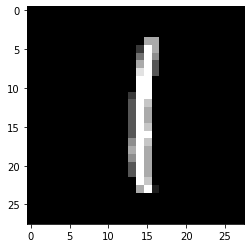

In [7]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [8]:
train_x.shape

(60000, 28, 28)

In [9]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

In [10]:
train_x.shape

(60000, 784)

* min-max scaling

In [11]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [ ]:
# max_num = train_x.max()

# train_x = train_x/max_num
# test_x = test_x/max_num

In [13]:
max_n, min_n = train_x.max(), train_x.min()
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [14]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
len_y = len(set(train_y))

In [18]:
train_y.shape

(60000,)

In [19]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [20]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [21]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [22]:
# Sequential API
# 1. 세션 초기화
keras.backend.clear_session()

# 2. 모델 선언
model = keras.models.Sequential()

# 3. 레이어 쌓기
model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(10, activation='softmax') )

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

# 모델 summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
es = EarlyStopping(monitor='val_loss',            # 관측 대상
                   min_delta=0,                   # 학습 성능 Threshold
                   patience=5,                    # 성능 개선되지 않더라도 몇 번 참을래?
                   verbose=1,                     
                   restore_best_weights=True)     # 가장 성능이 좋았던 epochs의 가중치를 쓸래 (Default=False)

In [25]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 9s 3ms/step - loss: 0.5104 - accuracy: 0.8683 - val_loss: 0.3200 - val_accuracy: 0.9110
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3178 - accuracy: 0.9114 - val_loss: 0.2886 - val_accuracy: 0.9217
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2937 - accuracy: 0.9174 - val_loss: 0.2770 - val_accuracy: 0.9252
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.9208 - val_loss: 0.2689 - val_accuracy: 0.9259
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2738 - accuracy: 0.9236 - val_loss: 0.2686 - val_accuracy: 0.9268
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2680 - accuracy: 0.9245 - val_loss: 0.2658 - val_accuracy: 0.9287
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2645 - accuracy: 0.9262 - val_loss: 0.2653 - val_accuracy:

In [26]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 0s 1ms/step
트레이닝 정확도 : 93.12%
테스트 정확도 : 92.74%


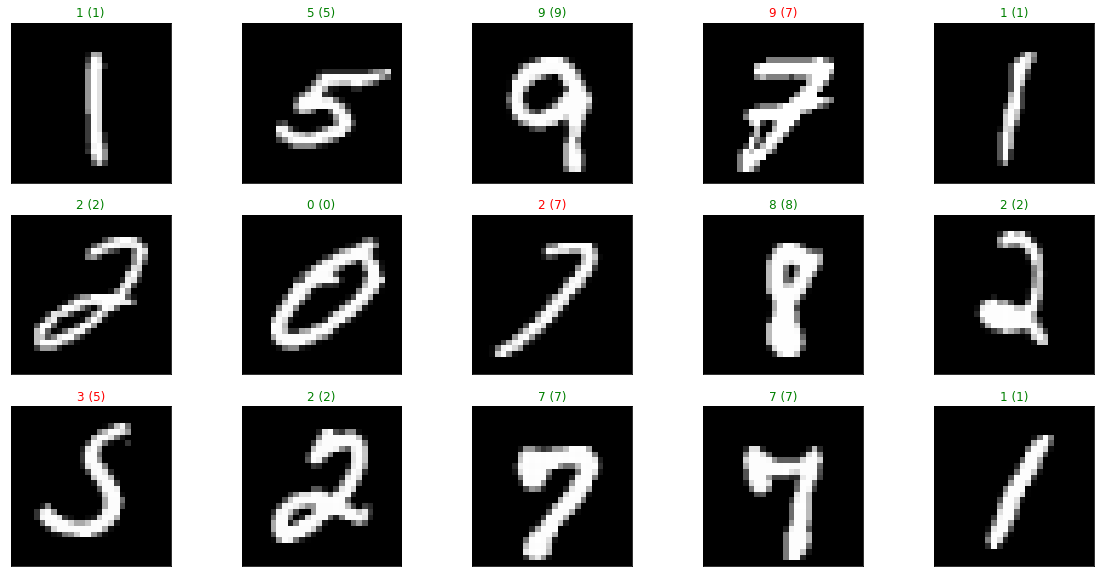

In [27]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 2780
다음 그림은 숫자 2 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 1.  0. 25. 72.  0.  0.  0.  0.  0.  0.]
틀렸어요


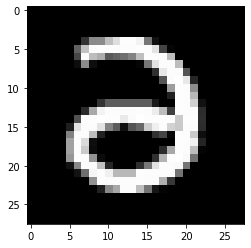

In [36]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [29]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.9274


[0.264964759349823, 0.9273999929428101]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [37]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [38]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [41]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2246 - accuracy: 0.9312 - val_loss: 0.1548 - val_accuracy: 0.9532
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.0968 - val_accuracy: 0.9697
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0686 - accuracy: 0.9794 - val_loss: 0.1036 - val_accuracy: 0.9706
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0536 - accuracy: 0.9826 - val_loss: 0.0836 - val_accuracy: 0.9766
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0959 - val_accuracy: 0.9752
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0984 - val_accuracy: 0.9770
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.1110 - val_accuracy:

In [42]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 1ms/step
트레이닝 정확도 : 98.87%
테스트 정확도 : 98.00%


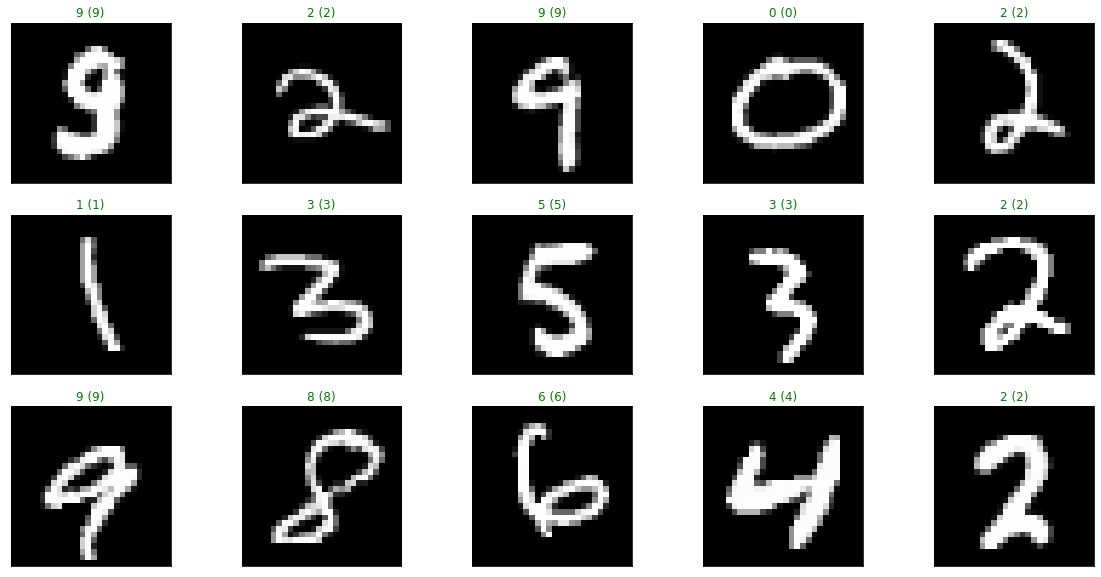

In [43]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 6847
다음 그림은 숫자 6 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 99.  0.  0.  0.  0.  0.]
틀렸어요


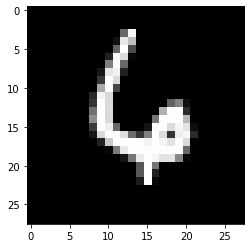

In [46]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)